In [1]:
# imports from Qiskit
from numpy import pi
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
import random
import numpy as np

In [2]:
import qiskit as qk
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute, Aer
from qiskit import IBMQ
from qiskit.visualization import plot_histogram
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

# imports from backend providers (IBM for superconductor, AQT for trapped ion)
from qiskit.providers.ibmq import IBMQ
from qiskit.providers.aqt import AQT

ibmq_provider = IBMQ.load_account()        # credentials stored on disk
aqt_provider_simulators = AQT.enable_account('2633b2d14dae4d9da7c9df2503857334')  # simulator credentials
# aqt_provider_device = AQT.enable_account('INPUT DEVICE CREDENTIALS HERE') # hardware credentials

ibmq_simulator = ibmq_provider.get_backend('ibmq_qasm_simulator')
ibmq_device = ibmq_provider.get_backend('ibmq_burlington')
aqt_simulator = aqt_provider_simulators.get_backend('aqt_qasm_simulator')
# calling noisy simulator the 'device' for now
aqt_device = aqt_provider_simulators.get_backend('aqt_qasm_simulator_noise_1')

# simple function that applies a series of unitary gates from a given string
def apply_secret_unitary(secret_unitary, qubit, quantum_circuit, dagger):
    functionmap = {
                    'x':quantum_circuit.x,
                    'y':quantum_circuit.y,
                    'z':quantum_circuit.z,
                    'h':quantum_circuit.h,                    
                    't':quantum_circuit.t,                    
    }
    if dagger: functionmap['t'] = quantum_circuit.tdg
    
    if dagger:
        [functionmap[unitary](qubit) for unitary in secret_unitary]
    else:
        [functionmap[unitary](qubit) for unitary in secret_unitary[::-1]]

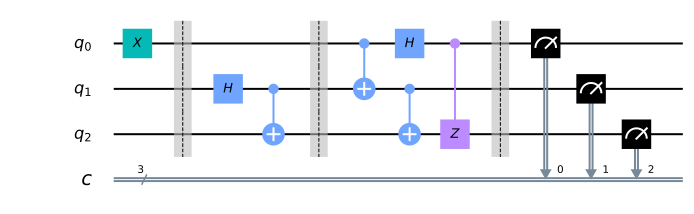

In [3]:
secret_unitary = 'x'
n = 3
qc = QuantumCircuit(n, n)
apply_secret_unitary(secret_unitary, qc.qubits[0], qc, dagger = 0)
qc.barrier()
qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.cx(1, 2)
qc.cz(0, 2)
qc.barrier()
qc.measure([0,1,2],[0,1,2])
qc.draw(output='mpl')

In [4]:
# display all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Backend in use:  aqt_qasm_simulator


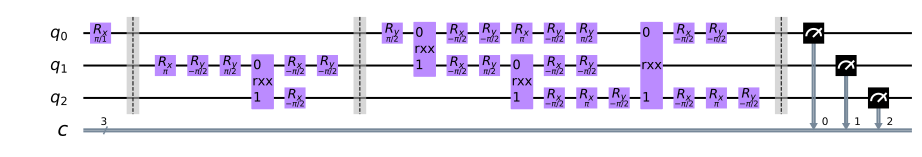

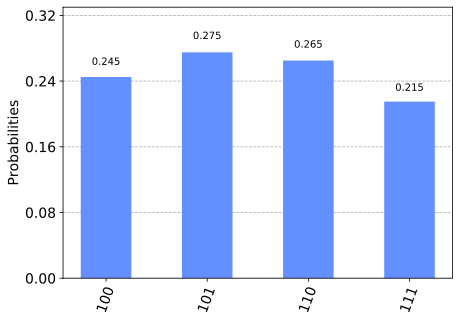

Done
Backend in use:  ibmq_qasm_simulator


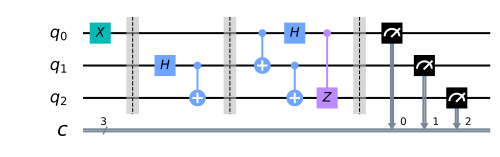

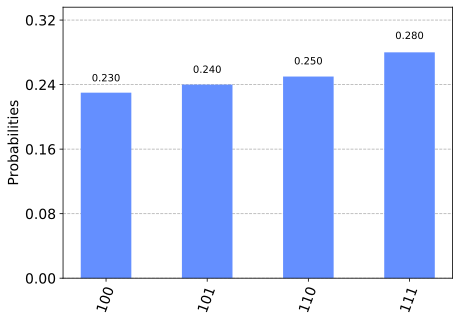

Done
Backend in use:  aqt_qasm_simulator_noise_1


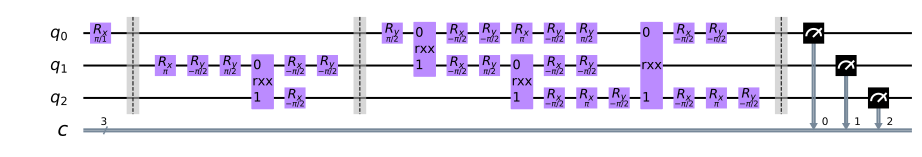

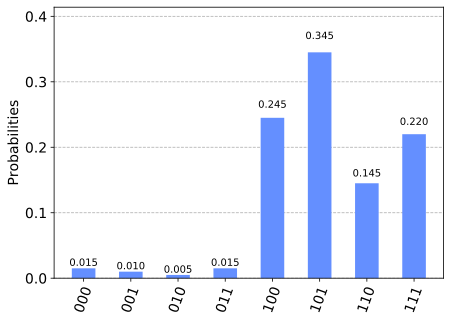

Done
Backend in use:  ibmq_burlington


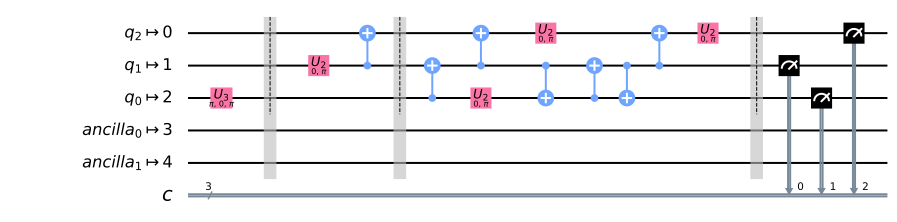

Job Status: job is queued (4)     

In [ ]:
# transpile, plot circuit, run, plot result
backends = [aqt_simulator, ibmq_simulator, aqt_device, ibmq_device]
for be in backends:
    print("Backend in use: ", be)
    new_qc = transpile(qc, be)
    new_qc.draw(output='mpl', scale=0.5)

    job = execute(new_qc, be, shots=200)
    if be == ibmq_device:
        job_monitor(job)
    counts = job.result().get_counts()
    plot_histogram(counts)
    print('Done')
    
    if be == aqt_simulator:
        aqt_sim_results = job.result()
        aqt_sim_counts = job.result().get_counts()
    if be == ibmq_simulator:
        ibmq_sim_results = job.result()
        ibmq_sim_counts = job.result().get_counts()
    if be == aqt_device:
        aqt_dev_results = job.result()
        aqt_dev_counts = job.result().get_counts()
    if be == ibmq_device:
        ibmq_dev_results = job.result()
        ibmq_dev_counts = job.result().get_counts()

In [ ]:
# plotting the results together
plot_histogram([aqt_sim_counts, ibmq_sim_counts, aqt_dev_counts, ibmq_dev_counts], 
               legend = ['AQT Simulator', 'IBMQ Simulator', 'AQT Device', 'IBMQ Device'],
               figsize = (15,10))

In [ ]:
# restore display settings
InteractiveShell.ast_node_interactivity = "last_expr"

In [ ]:
plot_histogram([aqt_dev_counts, ibmq_mit_counts], 
               legend = ['noisy AQT results', 'mitigated IBMQ results'], 
               figsize = (14,10))

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table